## HealthCare Cost Prediction w/ Linear Regression

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn import metrics

### Data Collection & Analysis

In [4]:
data = pd.read_csv('C:/Users/HP/insurance.csv')

In [5]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
data.shape

(1338, 7)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
data.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [9]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Data Analysis

In [10]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


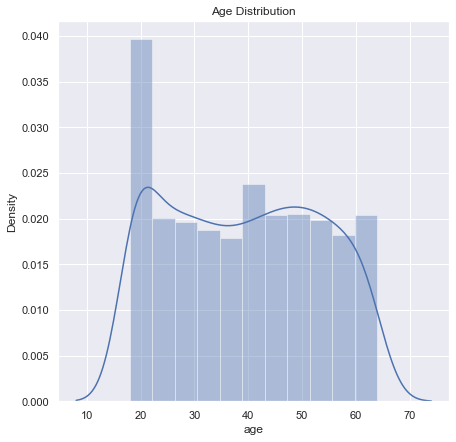

In [12]:
sns.set()
plt.figure(figsize=(7,7))
sns.distplot(data['age'])
plt.title('Age Distribution')
plt.show()

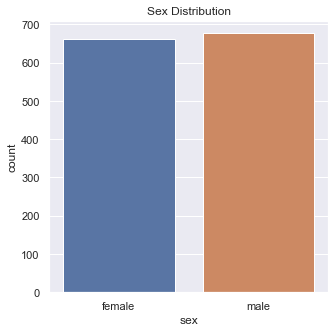

In [17]:
plt.figure(figsize=(5,5))
sns.countplot(x='sex',data=data)
plt.title('Sex Distribution')
plt.show()


In [14]:
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


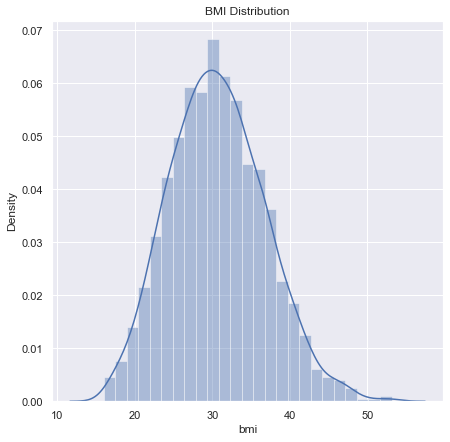

In [15]:
plt.figure(figsize=(7,7))
sns.distplot(data['bmi'])
plt.title('BMI Distribution')
plt.show()

In [ ]:
BMI= kg/m^2
Normal BMI Range: 18.5 to 24.9

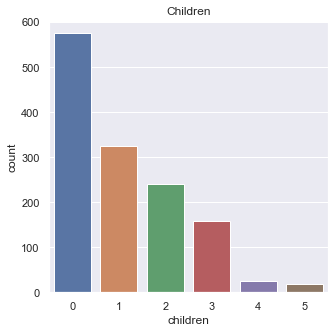

In [18]:
plt.figure(figsize=(5,5))
sns.countplot(x='children',data=data)
plt.title('Children')
plt.show()

In [20]:
data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

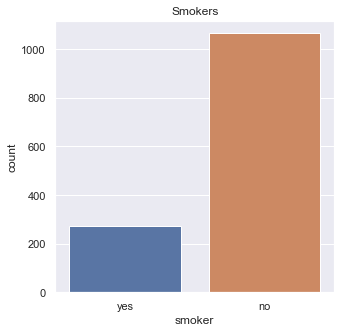

In [21]:
plt.figure(figsize=(5,5))
sns.countplot(x='smoker',data=data)
plt.title('Smokers')
plt.show()

In [22]:
data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

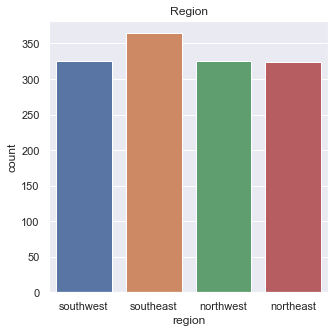

In [23]:
plt.figure(figsize=(5,5))
sns.countplot(x='region',data=data)
plt.title('Region')
plt.show()

In [24]:
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


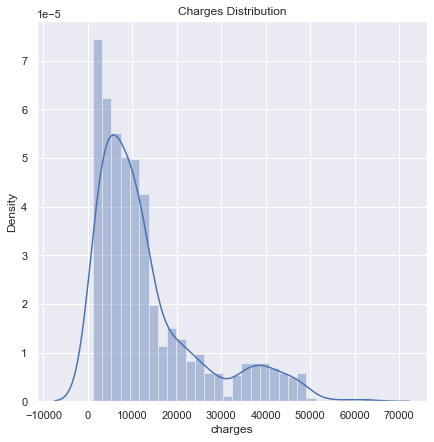

In [25]:
sns.set()
plt.figure(figsize=(7,7))
sns.distplot(data['charges'])
plt.title('Charges Distribution')
plt.show()

### Data Pre-Processing

In [30]:
# encoding 'sex' column
data.replace({'sex':{'male':0, 'female':1}}, inplace=True)

## encoding 'smoker' column
data.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)

## encoding 'region' column
data.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}},inplace=True)

### Splitting the Features and Target

In [29]:
X= data.drop(columns='charges',axis=1)
Y= data['charges']

In [31]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [32]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


### Spliting data into Training & Testing Data

In [33]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, random_state=2)

In [34]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


### Model Training using Linear Regression

In [35]:
regressor= LinearRegression()

In [36]:
regressor.fit(X_train, Y_train)

LinearRegression()

### Model Evaluation

In [37]:
training_data_prediction= regressor.predict(X_train)

In [39]:
r2_train = metrics.r2_score(Y_train,training_data_prediction)
print('R Square Value: ',r2_train)

R Square Value:  0.751505643411174


In [40]:
test_data_prediction= regressor.predict(X_test)

In [41]:
r2_test = metrics.r2_score(Y_test,test_data_prediction)
print('R Square Value: ',r2_test)

R Square Value:  0.7447273869684077


### Building a Predicitve Sysytem

In [50]:
input_data= (31,1,25.74,0,1,0)

#tuple to array
Z= np.array(input_data)

#reshape array
R= Z.reshape(1,-1)

prediction = regressor.predict(R)
print('Insurance Cost: ',prediction)



Insurance Cost:  [3760.0805765]
